In [9]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [10]:
path = '../team.csv'
df = pd.read_csv(path, sep = ',')
# Visualizamos los 5 primeros datos:
pd.set_option('display.max_columns', None)
df.head(5)

,year,league_id,team_id,franchise_id,div_id,rank,g,ghome,w,l,div_win,wc_win,lg_win,ws_win,r,ab,h,double,triple,hr,bb,so,sb,cs,hbp,sf,ra,er,era,cg,sho,sv,ipouts,ha,hra,bba,soa,e,dp,fp,name,park,attendance,bpf,ppf,team_id_br,team_id_lahman45,team_id_retro
0,1871,NaN,BS1,BNA,NaN,3.0,31.0,NaN,20.0,10.0,NaN,NaN,N,NaN,401.0,1372.0,426.0,70.0,37.0,3.0,60.0,19.0,73.0,NaN,NaN,NaN,303.0,109.0,3.55,22.0,1.0,3.0,828.0,367.0,2.0,42.0,23.0,225.0,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103.0,98.0,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2.0,28.0,NaN,19.0,9.0,NaN,NaN,N,NaN,302.0,1196.0,323.0,52.0,21.0,10.0,60.0,22.0,69.0,NaN,NaN,NaN,241.0,77.0,2.76,25.0,0.0,1.0,753.0,308.0,6.0,28.0,22.0,218.0,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104.0,102.0,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8.0,29.0,NaN,10.0,19.0,NaN,NaN,N,NaN,249.0,1186.0,328.0,35.0,40.0,7.0,26.0,25.0,18.0,NaN,NaN,NaN,341.0,116.0,4.11,23.0,0.0,0.0,762.0,346.0,13.0,53.0,34.0,223.0,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96.0,100.0,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7.0,19.0,NaN,7.0,12.0,NaN,NaN,N,NaN,137.0,746.0,178.0,19.0,8.0,2.0,33.0,9.0,16.0,NaN,NaN,NaN,243.0,97.0,5.17,19.0,1.0,0.0,507.0,261.0,5.0,21.0,17.0,163.0,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101.0,107.0,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5.0,33.0,NaN,16.0,17.0,NaN,NaN,N,NaN,302.0,1404.0,403.0,43.0,21.0,1.0,33.0,15.0,46.0,NaN,NaN,NaN,313.0,121.0,3.72,32.0,1.0,0.0,879.0,373.0,7.0,42.0,22.0,227.0,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90.0,88.0,NYU,NY2,NY2


In [11]:
columnas_extraer = ['year','team_id','name','rank','g','w','l','r','h','double','triple','hr','bb']
df_clean = df[columnas_extraer]

In [12]:
df_clean.head(5)

,year,team_id,name,rank,g,w,l,r,h,double,triple,hr,bb
0,1871,BS1,Boston Red Stockings,3.0,31.0,20.0,10.0,401.0,426.0,70.0,37.0,3.0,60.0
1,1871,CH1,Chicago White Stockings,2.0,28.0,19.0,9.0,302.0,323.0,52.0,21.0,10.0,60.0
2,1871,CL1,Cleveland Forest Citys,8.0,29.0,10.0,19.0,249.0,328.0,35.0,40.0,7.0,26.0
3,1871,FW1,Fort Wayne Kekiongas,7.0,19.0,7.0,12.0,137.0,178.0,19.0,8.0,2.0,33.0
4,1871,NY2,New York Mutuals,5.0,33.0,16.0,17.0,302.0,403.0,43.0,21.0,1.0,33.0


In [13]:
df_clean.isna().sum()

year       0
team_id    3
name       3
rank       3
g          3
w          3
l          3
r          3
h          3
double     3
triple     3
hr         3
bb         3
dtype: int64

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2808 non-null   object 
 1   team_id  2805 non-null   object 
 2   name     2805 non-null   object 
 3   rank     2805 non-null   float64
 4   g        2805 non-null   float64
 5   w        2805 non-null   float64
 6   l        2805 non-null   float64
 7   r        2805 non-null   float64
 8   h        2805 non-null   float64
 9   double   2805 non-null   float64
 10  triple   2805 non-null   float64
 11  hr       2805 non-null   float64
 12  bb       2805 non-null   float64
dtypes: float64(10), object(3)
memory usage: 285.3+ KB


In [ ]:
#df_clean['year'] = df_clean['year'].astype(float)

Text(0.5, 1.0, 'Valores Ganadas')

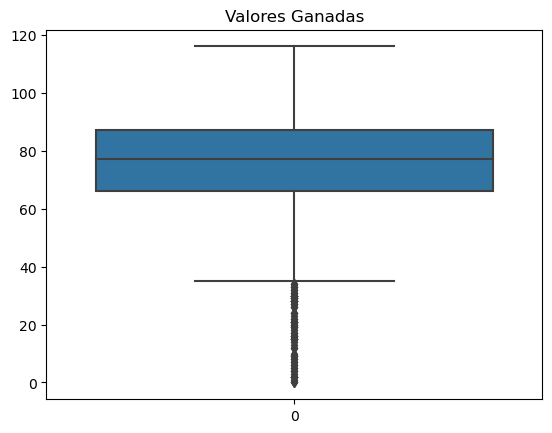

In [17]:
sns.boxplot(data=df['w']).set_title('Valores Ganadas') 

In [18]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,2805.0,4.107308,2.323414,1.0,2.0,4.0,6.0,13.0
g,2805.0,150.347950,23.227250,6.0,153.0,157.0,162.0,165.0
w,2805.0,74.749020,17.640402,0.0,66.0,77.0,87.0,116.0
l,2805.0,74.749020,17.378079,4.0,65.0,76.0,87.0,134.0
r,2805.0,681.945811,135.738244,24.0,613.0,690.0,763.0,1220.0
h,2805.0,1346.273440,219.891603,33.0,1299.0,1393.0,1467.0,1783.0
double,2805.0,227.624955,58.692602,3.0,193.0,231.0,270.0,376.0
triple,2805.0,47.104100,22.268620,0.0,31.0,41.0,60.0,150.0
hr,2805.0,101.136542,61.468300,0.0,42.0,107.0,149.0,264.0
bb,2805.0,473.649198,132.585884,0.0,425.0,493.0,554.0,835.0


In [19]:
df_clean['year'] = pd.to_numeric(df['year'],errors='coerce')

/tmp/ipykernel_3817/2962922391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = pd.to_numeric(df['year'],errors='coerce')


In [20]:
df_clean.dropna(subset=['year'], inplace=True)

/tmp/ipykernel_3817/1719308038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(subset=['year'], inplace=True)


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2804 entries, 0 to 2807
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2804 non-null   float64
 1   team_id  2804 non-null   object 
 2   name     2804 non-null   object 
 3   rank     2804 non-null   float64
 4   g        2804 non-null   float64
 5   w        2804 non-null   float64
 6   l        2804 non-null   float64
 7   r        2804 non-null   float64
 8   h        2804 non-null   float64
 9   double   2804 non-null   float64
 10  triple   2804 non-null   float64
 11  hr       2804 non-null   float64
 12  bb       2804 non-null   float64
dtypes: float64(11), object(2)
memory usage: 306.7+ KB


In [22]:
df_clean = df_clean[df_clean['year'] >= 2000]

In [23]:
df_clean.head(5)

,year,team_id,name,rank,g,w,l,r,h,double,triple,hr,bb
2328,2000.0,ANA,Anaheim Angels,3.0,162.0,82.0,80.0,864.0,1574.0,309.0,34.0,236.0,608.0
2329,2000.0,ARI,Arizona Diamondbacks,3.0,162.0,85.0,77.0,792.0,1466.0,282.0,44.0,179.0,535.0
2330,2000.0,ATL,Atlanta Braves,1.0,162.0,95.0,67.0,810.0,1490.0,274.0,26.0,179.0,595.0
2331,2000.0,BAL,Baltimore Orioles,4.0,162.0,74.0,88.0,794.0,1508.0,310.0,22.0,184.0,558.0
2332,2000.0,BOS,Boston Red Sox,2.0,162.0,85.0,77.0,792.0,1503.0,316.0,32.0,167.0,611.0


In [24]:
df_clean.describe()

,year,rank,g,w,l,r,h,double,triple,hr,bb
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2007.500000,3.022917,161.958333,80.968750,80.968750,739.537500,1448.314583,289.277083,30.202083,166.672917,522.350000
std,4.614582,1.458363,0.313798,11.417722,11.400704,84.824137,82.421184,27.476775,8.830035,33.569659,71.227724
min,2000.000000,1.000000,161.000000,43.000000,46.000000,513.000000,1199.000000,201.000000,12.000000,91.000000,363.000000
25%,2003.750000,2.000000,162.000000,72.000000,72.000000,681.750000,1386.000000,271.750000,24.000000,142.750000,471.000000
50%,2007.500000,3.000000,162.000000,82.000000,80.000000,735.000000,1447.000000,289.000000,30.000000,164.000000,520.000000
75%,2011.250000,4.000000,162.000000,90.000000,90.000000,795.250000,1506.000000,307.000000,36.000000,188.000000,567.000000
max,2015.000000,6.000000,163.000000,116.000000,119.000000,978.000000,1667.000000,376.000000,61.000000,260.000000,775.000000


In [25]:
df_clean = df_clean.reset_index(drop=True)

Text(0.5, 1.0, 'Valores Ganadas')

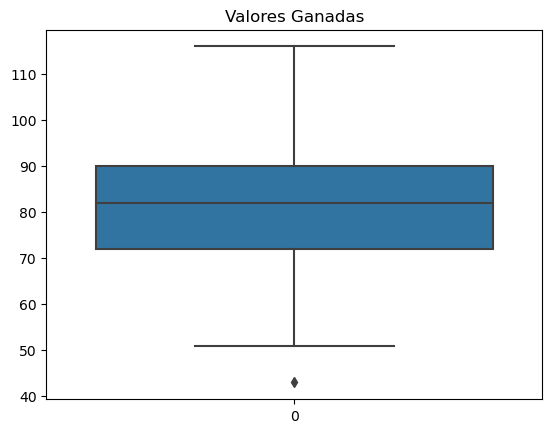

In [26]:
sns.boxplot(data=df_clean['w']).set_title('Valores Ganadas') 

Text(0.5, 1.0, 'Perdidas')

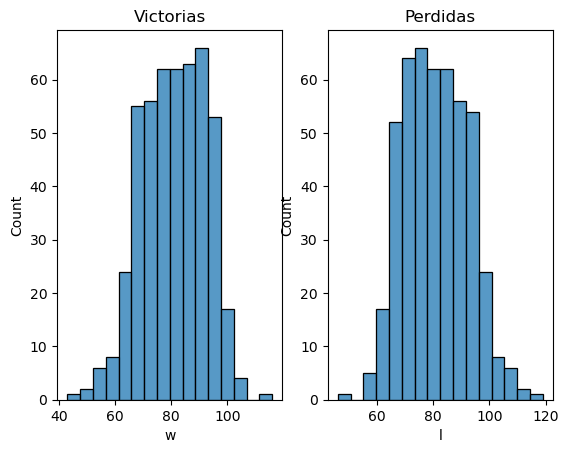

In [27]:
fig, axes = plt.subplots(1,2)
sns.histplot(df_clean["w"],ax = axes[0]).set_title('Victorias')
sns.histplot(df_clean["l"],ax = axes[1]).set_title('Perdidas')

Text(0.5, 1.0, 'Homeruns relacion Victorias')

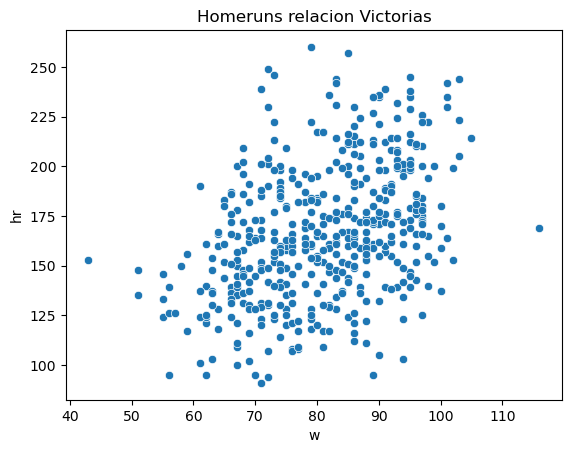

In [28]:
sns.scatterplot(x="w", y="hr", data=df_clean).set_title("Homeruns relacion Victorias")

Text(0.5, 1.0, 'Homeruns relacion Perdidas')

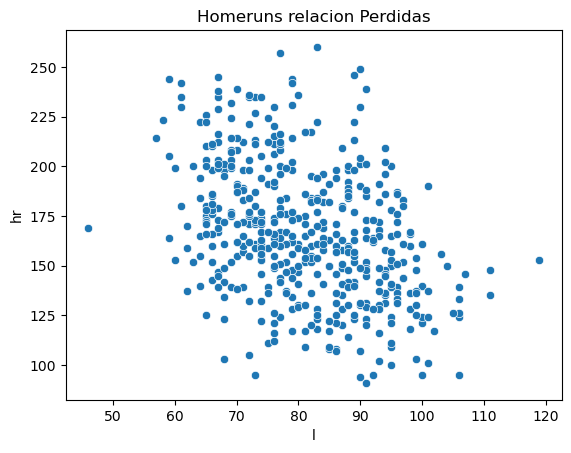

In [29]:
sns.scatterplot(x="l", y="hr", data=df_clean).set_title("Homeruns relacion Perdidas")

Text(0.5, 1.0, 'Perdidas relacion Victorias')

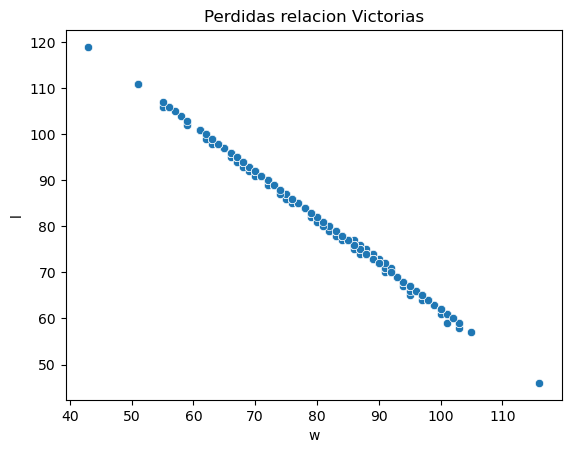

In [30]:
sns.scatterplot(x="w", y="l", data=df_clean).set_title("Perdidas relacion Victorias")

Text(0.5, 1.0, 'Victorias y rangos')

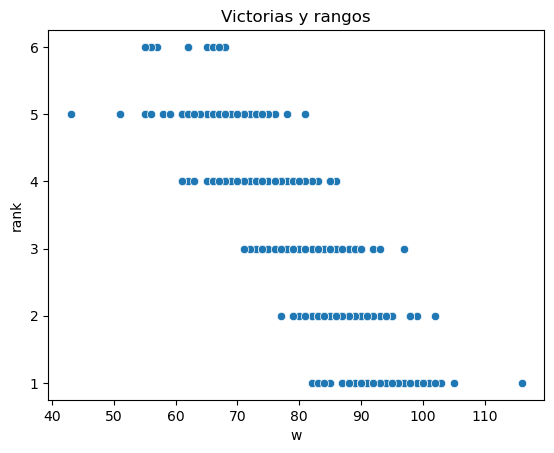

In [31]:
sns.scatterplot(x="w", y="rank", data=df_clean).set_title("Victorias y rangos")

In [32]:
col_interes =  ['w','hr']
df_interes = df_clean[col_interes]

In [33]:
X = sm.add_constant(df_interes['w'])
modelo = sm.OLS(df_interes['hr'], X)
resultado_modelo = modelo.fit()

In [34]:
print(resultado_modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                     hr   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     87.54
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           3.21e-19
Time:                        08:05:22   Log-Likelihood:                -2326.8
No. Observations:                 480   AIC:                             4658.
Df Residuals:                     478   BIC:                             4666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.0105     10.109      7.222      0.0

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     480 non-null    float64
 1   team_id  480 non-null    object 
 2   name     480 non-null    object 
 3   rank     480 non-null    float64
 4   g        480 non-null    float64
 5   w        480 non-null    float64
 6   l        480 non-null    float64
 7   r        480 non-null    float64
 8   h        480 non-null    float64
 9   double   480 non-null    float64
 10  triple   480 non-null    float64
 11  hr       480 non-null    float64
 12  bb       480 non-null    float64
dtypes: float64(11), object(2)
memory usage: 48.9+ KB


In [37]:
columnas_extraer = ['rank','g','w','l','r','h','double','triple','hr','bb']
df_clean2 = df[columnas_extraer]

In [39]:
df_corr = df_clean2.corr()
df_corr.style.background_gradient(cmap='Blues')

,rank,g,w,l,r,h,double,triple,hr,bb
rank,1.000000,-0.171295,-0.732510,0.502550,-0.447966,-0.306493,-0.364275,0.065342,-0.358621,-0.283531
g,-0.171295,1.000000,0.676371,0.661355,0.532620,0.867794,0.679297,0.002071,0.522866,0.774200
w,-0.732510,0.676371,1.000000,-0.102111,0.677243,0.725160,0.586949,0.086865,0.484075,0.655929
l,0.502550,0.661355,-0.102111,1.000000,0.028576,0.436382,0.339586,-0.122844,0.248887,0.385736
r,-0.447966,0.532620,0.677243,0.028576,1.000000,0.801701,0.692903,0.252232,0.500400,0.647082
h,-0.306493,0.867794,0.725160,0.436382,0.801701,1.000000,0.817653,0.152675,0.532589,0.738454
double,-0.364275,0.679297,0.586949,0.339586,0.692903,0.817653,1.000000,-0.134633,0.666301,0.646537
triple,0.065342,0.002071,0.086865,-0.122844,0.252232,0.152675,-0.134633,1.000000,-0.535670,-0.083332
hr,-0.358621,0.522866,0.484075,0.248887,0.500400,0.532589,0.666301,-0.535670,1.000000,0.600586
bb,-0.283531,0.774200,0.655929,0.385736,0.647082,0.738454,0.646537,-0.083332,0.600586,1.000000
